## Import necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout

In [3]:
df = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Downloads\data\demo_data\4.linearsep.csv", header = None)

## Performing little bit of EDA

In [4]:
df.columns = ['feature_1', 'feature_2','output'] #changing the columns name to more readable ones.

In [5]:
df.head()

,feature_1,feature_2,output
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [6]:
df.isna().sum() # no missing values

feature_1    0
feature_2    0
output       0
dtype: int64

In [7]:
df['output'].value_counts(normalize=True) # there is no imbalance

1.0    0.5
0.0    0.5
Name: output, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   output     100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [9]:
df.describe(include='all')

,feature_1,feature_2,output
count,100.000000,100.000000,100.000000
mean,0.930868,1.855540,0.500000
std,1.248367,0.713457,0.502519
min,-1.801737,0.568025,0.000000
25%,-0.143369,1.296152,0.000000
50%,1.171946,1.806731,0.500000
75%,1.881075,2.249652,1.000000
max,3.108743,3.892678,1.000000


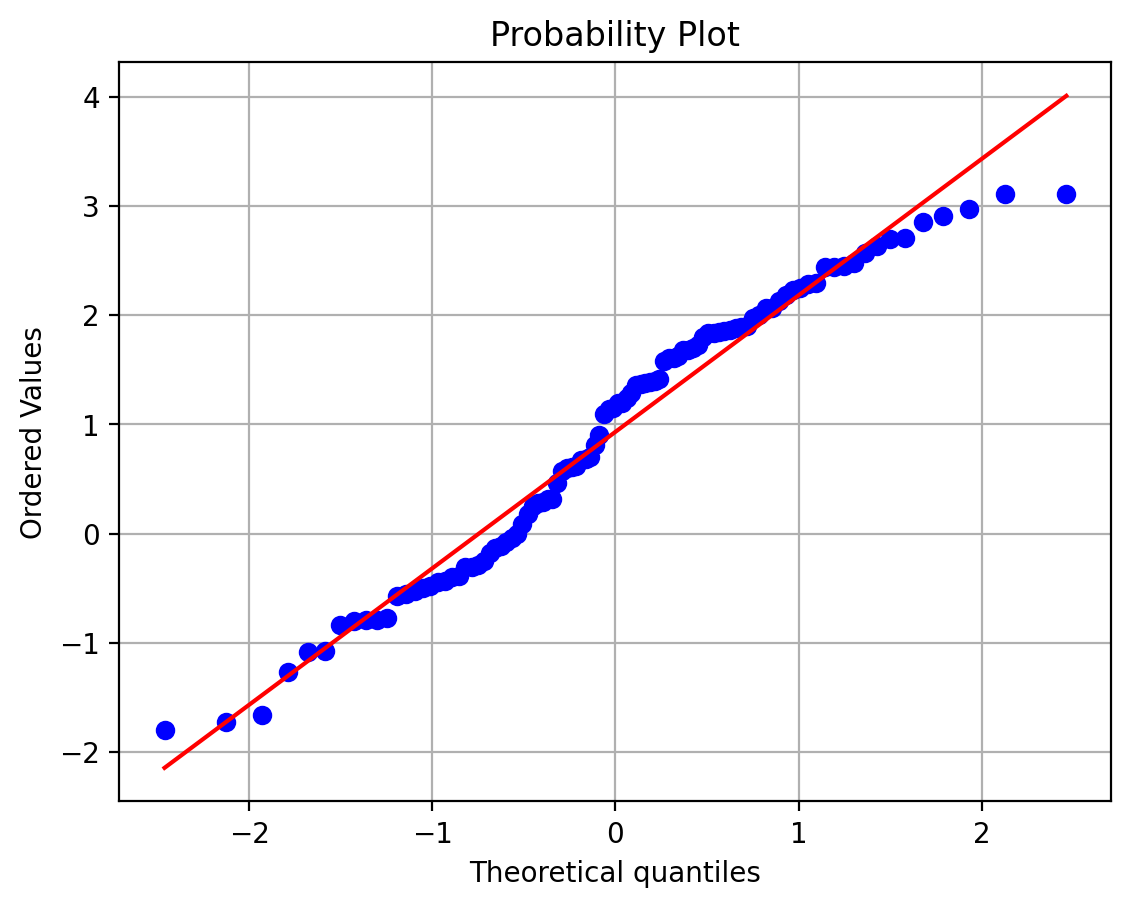

In [10]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_1'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_1 is having normal distribution since majority points are lying on the line.

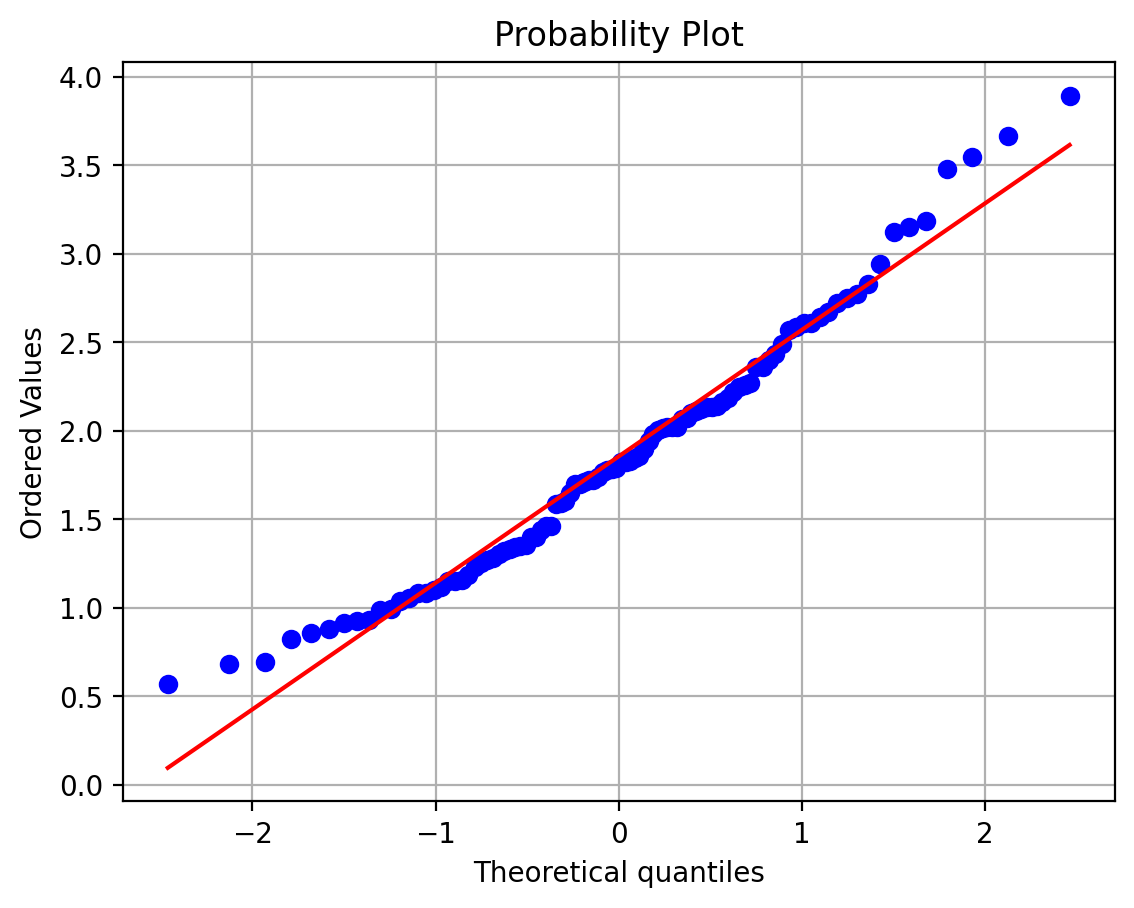

In [11]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_2'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_2 is having normal distribution has majority points are lying on the line.

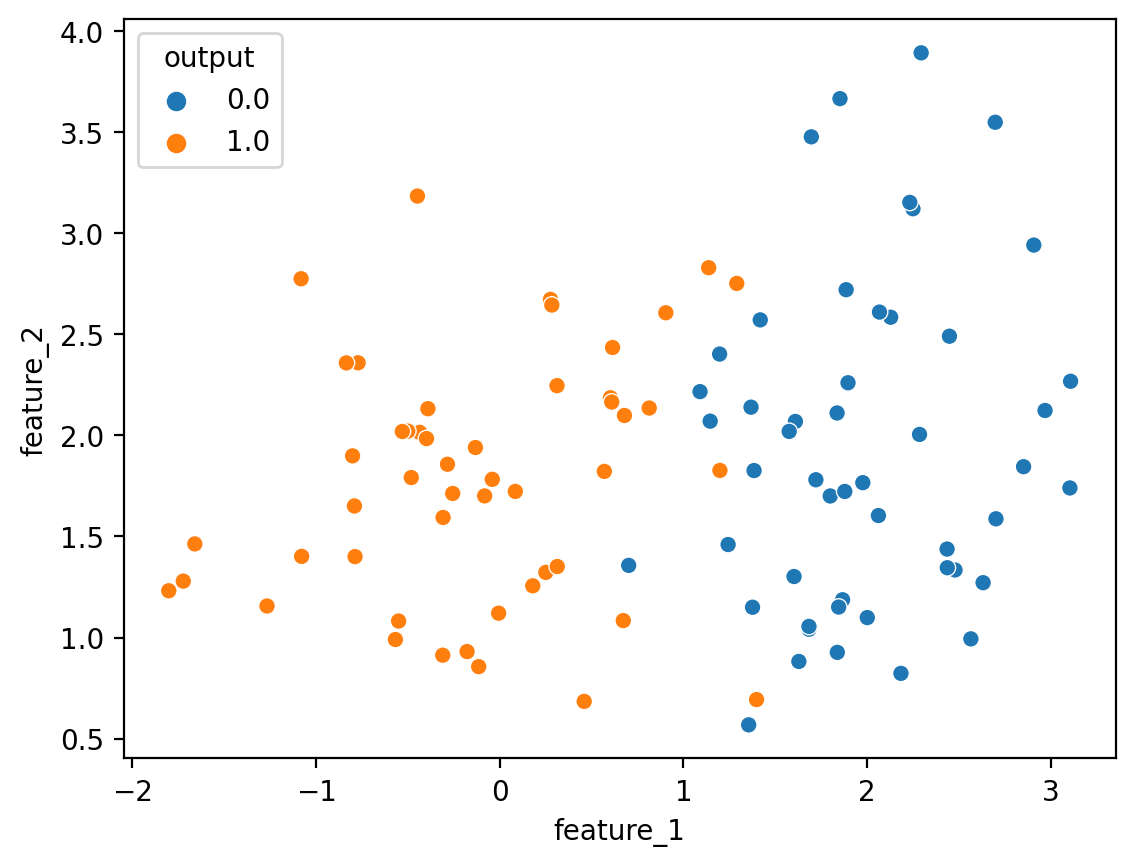

In [12]:
sns.scatterplot(x = 'feature_1',y='feature_2', hue = 'output', data = df);

### Intution
* clearly there is no linearity between input features.
* We can see a clear separation between the data points


## Segregation of input and output features

In [13]:
X = df[['feature_1','feature_2']]
y=df['output']

## Spliting the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)

## Data preprocessing of train and test data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trns=sc.fit_transform(X_train)

In [16]:
X_test_trns = sc.transform(X_test)

## Building the Architecture

In [17]:
model = Sequential()
model.add(Dense(6,activation='relu', input_dim = 2))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


## Compiling the Architecture & Model Creation

In [19]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Model Training Phase

In [20]:
history = model.fit(X_train_trns,y_train,epochs =200,validation_split = 0.2 )

Epoch 1/200
2/2 [==============================] - 1s 169ms/step - loss: 0.8622 - accuracy: 0.5312 - val_loss: 0.7848 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 31ms/step - loss: 0.8551 - accuracy: 0.5312 - val_loss: 0.7801 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.8492 - accuracy: 0.5312 - val_loss: 0.7754 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.8428 - accuracy: 0.5312 - val_loss: 0.7708 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 28ms/step - loss: 0.8369 - accuracy: 0.5312 - val_loss: 0.7662 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 0.8314 - accuracy: 0.5312 - val_loss: 0.7618 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 0.8253 - accuracy: 0.5469 - val_loss: 0.7574 - val_accuracy: 0.5000
Epoch 8/200
2/2 [==

## Prediction Phase

In [21]:
Y_cap = model.predict(X_test_trns)

1/1 [==============================] - 0s 82ms/step


In [22]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [23]:
Y_cap_f

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])

## Model Evaluation

In [24]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.95

## Ploting the Best Decision Surface Region

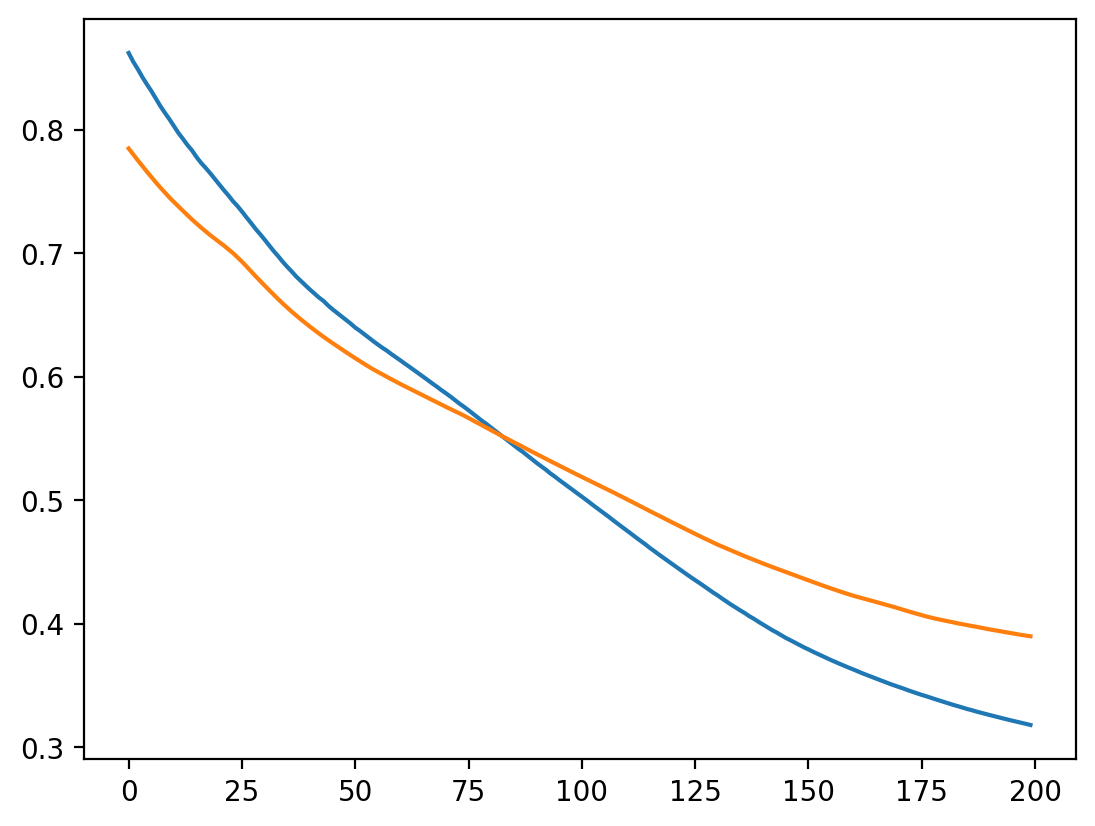

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [26]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 901us/step


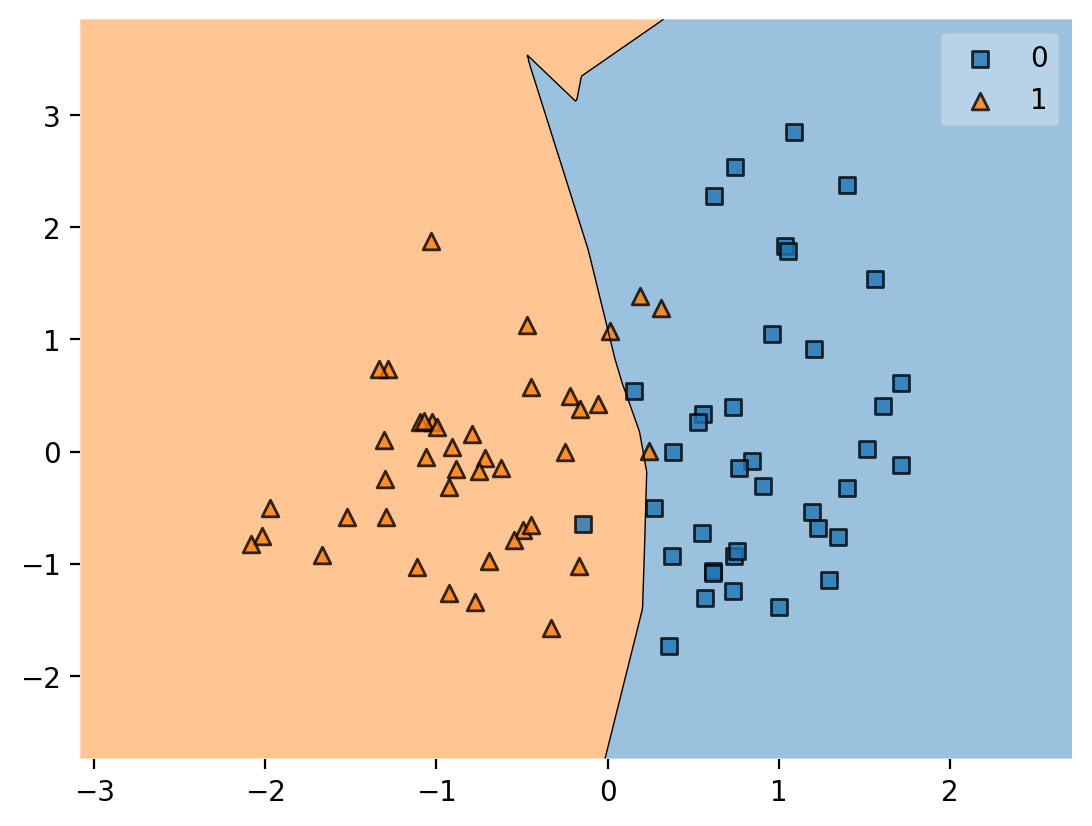

In [27]:
plot_decision_regions(X_train_trns, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 8s 810us/step


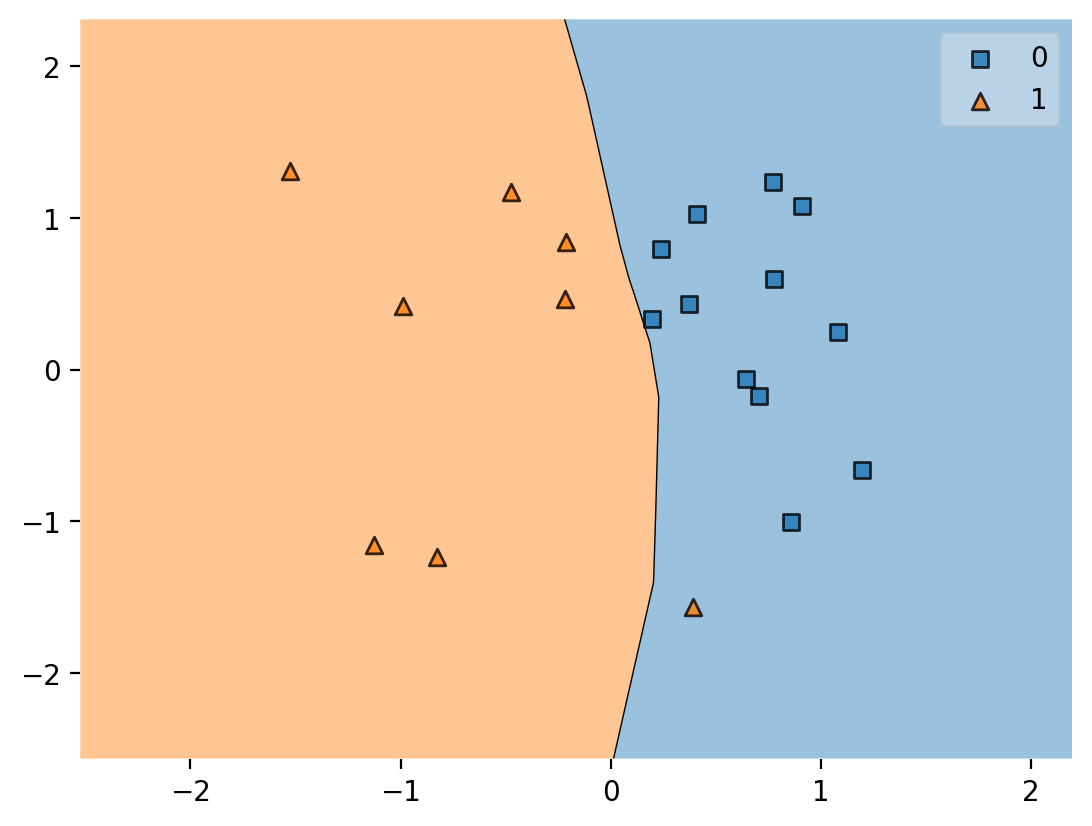

In [28]:
plot_decision_regions(X_test_trns, y_test.values.astype(int), clf = model);

## Conclusions:
* THe train score turned out to be `95.3% and validation score 87%.` 
* I have predicted and evaluated the model’s performance, got a score of `95% on the unseen data.`
* There is no overfiting as the train score and the test score almost equal which proves that my model has learned well from the train data and predicted well on the unseen data.
* As we know for a best fit model the train and test score should be as high as possible.